In [60]:
#empezamos importando las librerias
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [61]:
#fijamos tamaño de graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

In [62]:
proceso = pd.read_csv('https://raw.githubusercontent.com/aaron-v-kane/Tareas_EstadisticaAplicada_15/main/proceso_desconocido.csv',index_col='tiempo')

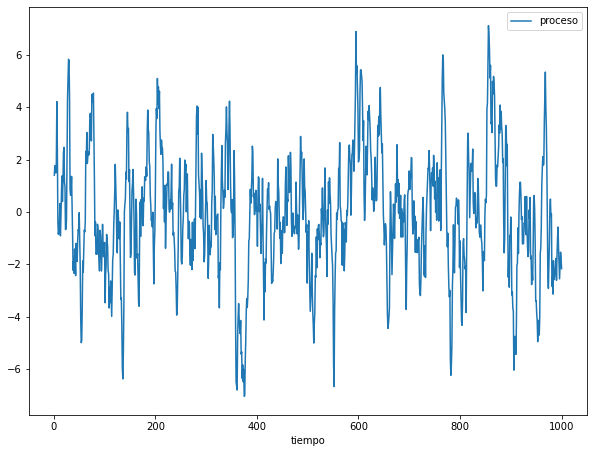

In [63]:
proceso.plot();

El proceso sí parece estacionario, mas entra en duda si realmente es, ya que la varianza no se ve del todo constante, sin embargo, la media sí.

In [64]:
#Realizamos la prueba de Raíces Unitarias (ADF)
result_adf = adfuller(proceso['proceso'])
if result_adf[1] < 0.05:
    
    print(f'con un un p-value={result_adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {result_adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


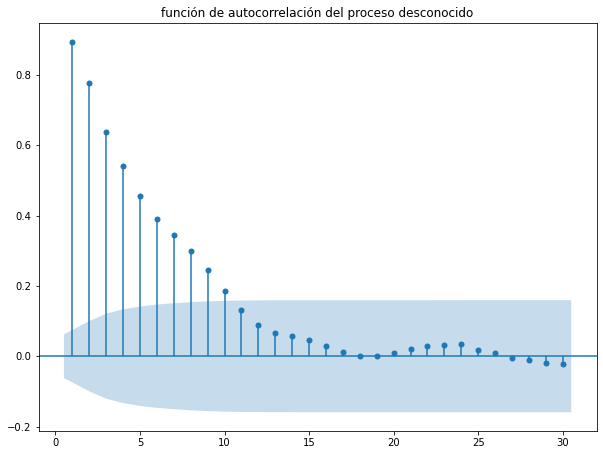

In [65]:
#grafica de autocorrelación ACF
plot_acf(proceso, zero=False, lags=30)
plt.title('función de autocorrelación del proceso desconocido')
plt.show()

La gráfica es muy similar a los ejemplos básicos, de aquí lo que se podría concluír es que el modelo no es de Medias Móviles, debido a que éstos marcan sus rezagos con la ACF.

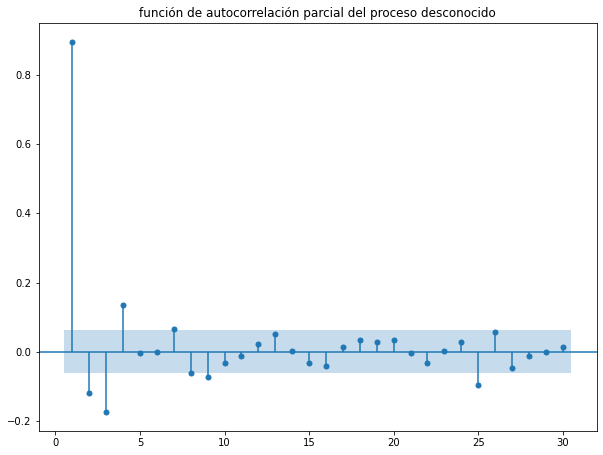

In [66]:
#grafica de autocorrelación parcial PACF
plot_pacf(proceso, zero=False, lags=30)
plt.title('función de autocorrelación parcial del proceso desconocido')
plt.show()

Dado que la gráfica del PACF no es decayente, como la del ACF, pareciera que el modelo es un AR. Observando que sus primeros 4 valores son significativos y el resto no, podría parecer un AR(4)

In [67]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(proceso, order=(ar,0,ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 1


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 2


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 3


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 4


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 0
AR: 1, MA: 1


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmode

AR: 1, MA: 2


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 3


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 4


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 0


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 1


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 2, MA: 2


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 3


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 4


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 0


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 1


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 2


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 3


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 4


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 0


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 1


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 2


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 3


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 4


C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AIC          BIC
AR MA                          
0  0   4554.099799  4563.915309
   1   3776.529813  3791.253079
   2   3254.748875  3274.379896
   3   3099.641698  3124.180475
   4   3005.769303  3035.215835
1  0   2938.589816  2953.313082
   1   2930.944168  2950.575189
   2   2887.641199  2912.179975
   3   2881.833150  2911.279682
   4   2882.057379  2916.411666
2  0   2926.860056  2946.491077
   1   2939.730505  2964.269281
   2   2880.467875  2909.914407
   3   2882.245082  2916.599369
   4   2883.907745  2923.169787
3  0   2898.413337  2922.952113
   1   2887.691717  2917.138249
   2   2882.071937  2916.426224
   3   2883.152269  2922.414311
   4   2886.236630  2930.406427
4  0   2882.286082  2911.732614
   1   2884.280488  2918.634775
   2   2886.282014  2925.544056
   3   2884.797957  2928.967755
   4   2874.130854  2923.208407

Los ordenamos de acuerdo al BIC 

In [68]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
2  2   2880.467875  2909.914407
1  3   2881.833150  2911.279682
4  0   2882.286082  2911.732614
1  2   2887.641199  2912.179975
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
3  1   2887.691717  2917.138249
4  1   2884.280488  2918.634775
3  3   2883.152269  2922.414311
   0   2898.413337  2922.952113
2  4   2883.907745  2923.169787
4  4   2874.130854  2923.208407
   2   2886.282014  2925.544056
   3   2884.797957  2928.967755
3  4   2886.236630  2930.406427
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
   0   2938.589816  2953.313082
2  1   2939.730505  2964.269281
0  4   3005.769303  3035.215835
   3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

Ahora de acuerdo al AIC

In [69]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  4   2874.130854  2923.208407
2  2   2880.467875  2909.914407
1  3   2881.833150  2911.279682
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
4  0   2882.286082  2911.732614
3  3   2883.152269  2922.414311
2  4   2883.907745  2923.169787
4  1   2884.280488  2918.634775
   3   2884.797957  2928.967755
3  4   2886.236630  2930.406427
4  2   2886.282014  2925.544056
1  2   2887.641199  2912.179975
3  1   2887.691717  2917.138249
   0   2898.413337  2922.952113
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
   0   2938.589816  2953.313082
2  1   2939.730505  2964.269281
0  4   3005.769303  3035.215835
   3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

Los modelos a probar serán:

    ARMA(2,2), sugerido por el BIC
Y

    ARMA(4,4), sugerido por el AIC

Observamos el resumen del modelo ARMA(2,2)

In [70]:
# estimamos un ARIMA (2,0,2)
modelo1 = ARIMA(proceso['proceso'], order=(2, 0, 2))
resultado1 = modelo1.fit()
resultado1.summary()

C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1434.234
Date:                Sun, 27 Mar 2022   AIC                           2880.468
Time:                        17:05:33   BIC                           2909.914
Sample:                             0   HQIC                          2891.660
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0958      0.259     -0.370      0.711      -0.603       0.411
ar.L1          0.4274      0.110      3.901      0.000       0.213       0.642
ar.L2          0.3408      0.100      3.406      0.001       0.145       0.537
ma.L1          0.5802      0.106      5.461      0.000       0.372       0.788
ma.L2          0.2907      0.035      8.417      0.000       0.223       0.358
sigma2         1.0292      0.048     21.657      0.000       0.936       1.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.98   Prob(JB):                         0.81
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Podemos ver que todas las patas, tanto AR como MA, son significativas

Ahora observamos el modelo ARMA(4,4)

In [71]:
# estimamos un ARIMA (4,0,4)
modelo2 = ARIMA(proceso['proceso'], order=(4, 0, 4))
resultado2 = modelo2.fit()
resultado2.summary()

C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\aaron\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1427.065
Date:                Sun, 27 Mar 2022   AIC                           2874.131
Time:                        17:05:41   BIC                           2923.208
Sample:                             0   HQIC                          2892.784
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.254     -0.391      0.696      -0.598       0.399
ar.L1          1.4774      0.122     12.133      0.000       1.239       1.716
ar.L2         -0.9466      0.246     -3.849      0.000      -1.429      -0.465
ar.L3         -0.0932      0.236     -0.396      0.692      -0.555       0.369
ar.L4          0.3593      0.102      3.533      0.000       0.160       0.559
ma.L1         -0.4744      0.119     -3.980      0.000      -0.708      -0.241
ma.L2          0.5434      0.133      4.072      0.000       0.282       0.805
ma.L3          0.2951      0.111      2.651      0.008       0.077       0.513
ma.L4          0.2561      0.039      6.558      0.000       0.180       0.333
sigma2         1.0142      0.047     21.552      0.000       0.922       1.106
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.87   Prob(JB):                         0.80
Heteroskedasticity (H):               1.02   Skew:                             0.02
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

A diferencia del ARMA(2,2), aquí la tercer pata de la parte AR no es significativa.

In [72]:
# vamos a estimar la serie con el modelo ARIMA
proceso['pronostico_1'] = resultado1.predict()
proceso['pronostico_2'] = resultado2.predict()

In [73]:
#Estimemos MAPE, MAD y MSD para ARMA(2,2)
MAPE_1 = 0
MAD_1 = 0
MSD_1 = 0
for t in range(1,1000):
    MAPE_1 = MAPE_1 + abs(((proceso.at[t,'proceso'] - proceso.at[t,'pronostico_1'])/proceso.at[t,'proceso']))
    MAD_1 = MAD_1 + abs((proceso.at[t,'proceso'] - proceso.at[t,'pronostico_1']))
    MSD_1 = MSD_1 + abs((proceso.at[t,'proceso'] - proceso.at[t,'pronostico_1'])**2)
    
MAPE_1 = MAPE_1/1000
MAD_1 = MAD_1/1000
MSD_1 = MSD_1/1000

print(f'el valor de MAPE para el modelo ARMA(2,2):{MAPE_1}')
print(f'el valor de MAD para el modelo ARMA(2,2):{MAD_1}')
print(f'el valor de MSD para el modelo ARMA(2,2):{MSD_1}')

el valor de MAPE para el modelo ARMA(2,2):2.9902162095330604
el valor de MAD para el modelo ARMA(2,2):0.8142100848819097
el valor de MSD para el modelo ARMA(2,2):1.0307159432191184


In [74]:
#Estimemos MAPE, MAD y MSD para ARMA(4,4)
MAPE_2 = 0
MAD_2 = 0
MSD_2 = 0
for t in range(1,1000):
    MAPE_2 = MAPE_2 + abs(((proceso.at[t,'proceso'] - proceso.at[t,'pronostico_2'])/proceso.at[t,'proceso']))
    MAD_2 = MAD_2 + abs((proceso.at[t,'proceso'] - proceso.at[t,'pronostico_2']))
    MSD_2 = MSD_2 + abs((proceso.at[t,'proceso'] - proceso.at[t,'pronostico_2'])**2)
    
MAPE_2 = MAPE_2/1000
MAD_2 = MAD_2/1000
MSD_2 = MSD_2/1000

print(f'el valor de MAPE para el modelo ARMA(4,4):{MAPE_2}')
print(f'el valor de MAD para el modelo ARMA(4,4):{MAD_2}')
print(f'el valor de MSD para el modelo ARMA(4,4):{MSD_2}')

el valor de MAPE para el modelo ARMA(4,4):3.008310527684586
el valor de MAD para el modelo ARMA(4,4):0.8087057607031702
el valor de MSD para el modelo ARMA(4,4):1.0160993112169459


El modelo ARMA(4,4) tiene valores menores en 2/3 parametros, siendo estos MAD y MSD

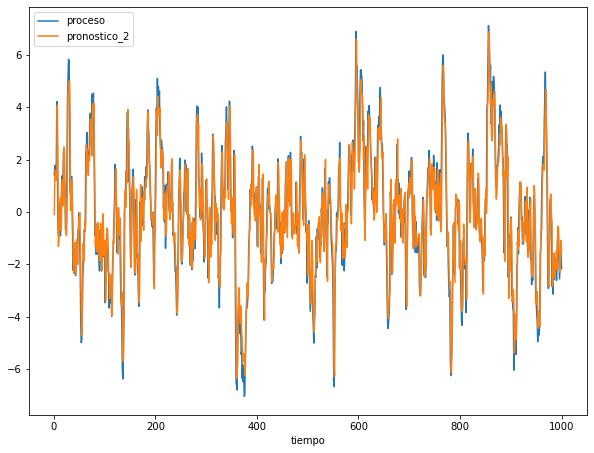

In [75]:
proceso[['proceso', 'pronostico_2']].plot()
plt.show()